# Extract the bigram from the baby name database

In [5]:
# These are the 32k baby names from the Social Security Administration
words = open('names.txt', 'r').read().splitlines()
print(words[:10])
print(f"Number of words: {len(words)}")
print(f"Minimum word length: {min(len(w) for w in words)}")
print(f"Maximum word length: {max(len(w) for w in words)}")


['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']
Number of words: 32033
Minimum word length: 2
Maximum word length: 15


In [3]:
# The bicharacter interator
for w in words[:1]:
    # Create a paired interator through the word
    for ch1, ch2 in zip(w, w[1:]):
        print(ch1, ch2)

e m
m m
m a


In [7]:
for w in words[:1]:
  # Add start and end tokens
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    print(ch1, ch2)

<S> e
e m
m m
m a
a <E>


In [13]:
# Initialize an empty dictionary to store the bigrams and their counts
b = {}

# Iterate over the first three words in the 'words' list
for w in words:
  # Add start and end tokens to the word
  chs = ['<S>'] + list(w) + ['<E>']
  
  # Iterate over the characters in the word
  for ch1, ch2 in zip(chs, chs[1:]):
    # Create a tuple representing the bigram
    bigram = (ch1, ch2)
    
    # Check if the bigram already exists in the dictionary
    # If it does, increment its count by 1; otherwise, add it to the dictionary with a count of 1
    # this counts the number of times the bigram appears in the words
    # b.get(bigram, 0) will get the value of the bigram if it exists, otherwise it will return 0
    b[bigram] = b.get(bigram, 0) + 1

In [15]:
# Define a function to sort a dictionary by its values in descending order
def sort_dict_by_value_descending(d):
    """
    Sorts a dictionary by its values in descending order.

    Args:
        d (dict): The dictionary to be sorted.

    Returns:
        list: A list of tuples containing the key-value pairs of the sorted dictionary.
    """
    return sorted(d.items(), key=lambda kv: -kv[1])

# Sort the dictionary 'b' by its values in descending order
sorted_b = sort_dict_by_value_descending(b)

# Alternatively, you can use the sorted() function directly on the dictionary items
# the key function is used to tell the sorted() function to sort the items based on the negated values of the dictionary tuple.
# 'n' is the most frequent bigram and the most frequent char before the end token
sorted_b = sorted(b.items(), key=lambda kv: -kv[1])
sorted_b[:10]

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963)]

In [20]:
char_set = set()
for k, v in sorted_b:
    char_set.add(k[0])
    char_set.add(k[1])
len(char_set)

28

In [37]:
sorted_b[:10]

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963)]

# Now that we have a dic of bigrmas, let's turn it to a df and visualize it
We have 26 alphabet plus start and stop token.

In [29]:
import torch
N = torch.zeros((28, 28), dtype=torch.int32)

In [30]:
# Extracting unique characters from the 'words' list and sorting them, there are 26 letters in the alphabet
chars = sorted(list(set(''.join(words))))

# String to Index. Creating a dictionary that maps each character to its index (starting from 1){'a': 1,'b': 2,...etc}
stoi = {s:i for i,s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27

# Index to String. Creating a dictionary that maps each index to its corresponding character
itos = {i:s for s,i in stoi.items()}

In [31]:
list('emma')

['e', 'm', 'm', 'a']

In [32]:
for w in words:
  # create a list of characters for the word and add start and end tokens
  chs = ['<S>'] + list(w) + ['<E>']
  # Count the chars of each word and create a 2d array where rows and columns representing the first and second characters of the bigram
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1
    

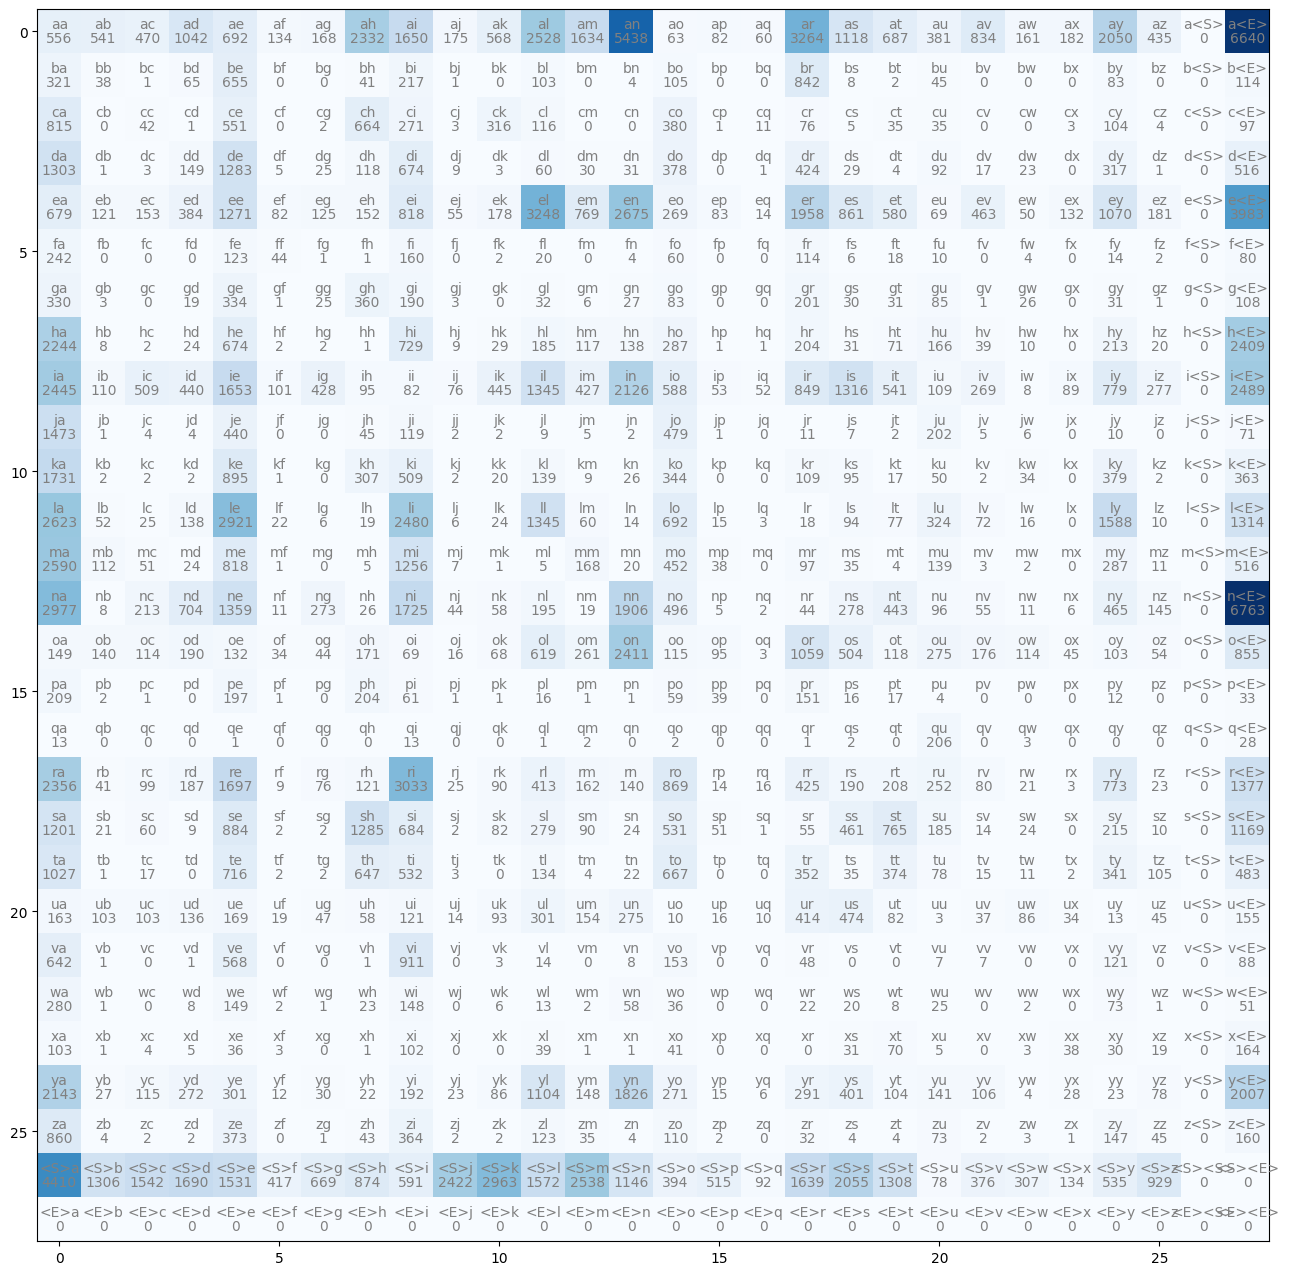

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        # create a character string for the bigram
        chstr = itos[i] + itos[j]
        # we know i is the row index and j is the column index, so we can use them to get the count of the bigram
        # plt.text(x, y, text, ha, va, color)
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        # .item() will get the value of the tensor
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');


## The row and col with the start and stop token is kind of redundant. How do we fix it?
here we are replacing the start and stop token with the special token "."

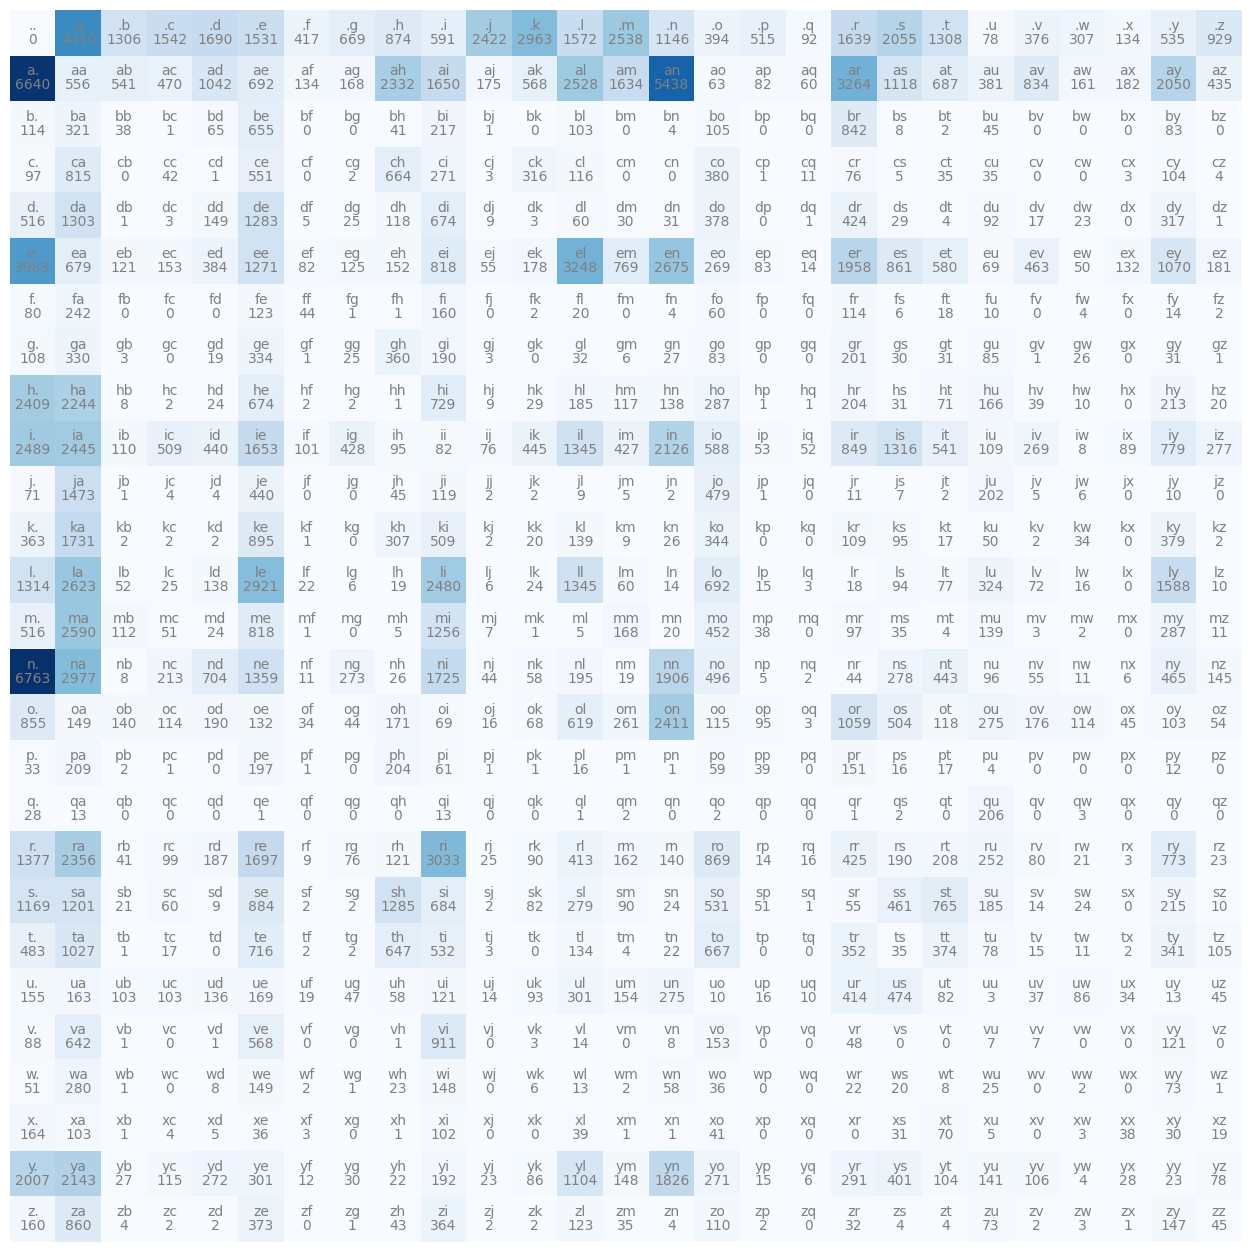

In [49]:
N = torch.zeros((27, 27), dtype=torch.int32)
# Extracting unique characters from the 'words' list and sorting them, there are 26 letters in the alphabet
chars = sorted(list(set(''.join(words))))

# String to Index. Creating a dictionary that maps each character to its index (starting from 1){'a': 1,'b': 2,...etc}
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0

# Index to String. Creating a dictionary that maps each index to its corresponding character
itos = {i:s for s,i in stoi.items()}

for w in words:
  # create a list of characters for the word and add start and end tokens
  chs = ['.'] + list(w) + ['.']
  # Count the chars of each word and create a 2d array where rows and columns representing the first and second characters of the bigram
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        # create a character string for the bigram
        chstr = itos[i] + itos[j]
        # we know i is the row index and j is the column index, so we can use them to get the count of the bigram
        # plt.text(x, y, text, ha, va, color)
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        # .item() will get the value of the tensor
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [71]:
# Example of sampling from a probability distribution
# This generates a probability distribution of 3 elements with a fixed seed
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
print(p)
# Use torch.multinomial to sample from the probability distribution
# This will generate 100 samples (index 0, 1, or 2) from the probabjjility distribution p
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([0.6064, 0.3033, 0.0903])


tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [72]:
# Grab the first row of the matrix, N[0,:] will also work.
# This will give us the counts of the first character of the bigram, which we can sample base on probabilities
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [75]:
# Convert the counts to probabilities. A, K, and M are among the most frequent characters to appear at the start of a word
p = N[0].float()
p = p / p.sum()
print(f"The probability distribution of the first row is: \n{p}")

# Torch.Generator is used to create a random number generator, if the seed is the same, the random numbers will be the same
g = torch.Generator().manual_seed(2147483647)
index = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() # use .item() to get the value of the tensor
print(f"The index of the sampled character is: {itos[index]}")

The probability distribution of the first row is: 
tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])
The index of the sampled character is: m


In [21]:
p.shape

torch.Size([3])

In [30]:
P.shape

torch.Size([27, 27])

In [29]:
P.sum(1, keepdim=True).shape

torch.Size([27, 1])

In [24]:
# 27, 27
# 27,  1

In [28]:
P.sum(1).shape

torch.Size([27])

In [26]:
# 27, 27
#  1, 27

In [310]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)

In [164]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


In [165]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [435]:
log_likelihood = 0.0
n = 0

for w in words:
#for w in ["andrejq"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-564996.8125, grad_fn=<AddBackward0>)
nll=tensor(564996.8125, grad_fn=<NegBackward0>)
2.476470470428467


In [449]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [450]:
xs

tensor([ 0,  5, 13, 13,  1])

In [451]:
ys

tensor([ 5, 13, 13,  1,  0])

In [487]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [488]:
xenc.shape

torch.Size([5, 27])

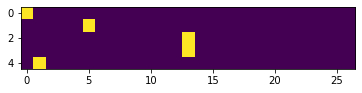

In [489]:
plt.imshow(xenc)

In [490]:
xenc.dtype

torch.float32

In [493]:
W = torch.randn((27, 1))
xenc @ W

tensor([[-0.2003, -2.3711, -0.9466,  0.5369, -0.0949, -1.7872, -0.9038,  0.8194,
          0.6926,  0.0114, -1.5301,  0.6077, -1.2056,  1.8605, -1.3012, -0.0301,
         -2.1611, -0.0538, -0.0133, -0.3629,  0.5254, -0.0080,  1.1602,  1.9851,
          0.4976,  0.7351, -0.6373],
        [-0.4422,  0.5024,  1.3514, -0.4085, -0.7854, -1.2568, -0.4558,  0.1466,
         -0.4460,  1.2748, -0.6367,  0.6403, -0.5617, -0.3060,  1.6771, -1.4814,
         -2.7395,  0.3876,  0.3970,  1.5577, -0.1995, -0.1397, -1.3045,  0.4294,
          1.2557,  0.8007,  0.5450],
        [-0.2680, -0.2640,  0.4591,  0.0338,  0.7478,  1.2757, -0.9842,  0.1799,
          0.0824, -0.5646, -0.3657, -0.8358, -1.7654,  0.5008, -1.7455, -0.8160,
         -2.2721,  0.9713, -1.0734,  0.3115, -0.2506,  0.0757,  0.9332,  1.6536,
          1.2306,  0.1231, -0.2530],
        [-0.2680, -0.2640,  0.4591,  0.0338,  0.7478,  1.2757, -0.9842,  0.1799,
          0.0824, -0.5646, -0.3657, -0.8358, -1.7654,  0.5008, -1.7455, -0.8160

In [506]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0205, 0.0023, 0.0097, 0.0428, 0.0228, 0.0042, 0.0101, 0.0568, 0.0500,
         0.0253, 0.0054, 0.0460, 0.0075, 0.1609, 0.0068, 0.0243, 0.0029, 0.0237,
         0.0247, 0.0174, 0.0423, 0.0248, 0.0799, 0.1822, 0.0412, 0.0522, 0.0132],
        [0.0154, 0.0397, 0.0928, 0.0160, 0.0110, 0.0068, 0.0152, 0.0278, 0.0154,
         0.0860, 0.0127, 0.0456, 0.0137, 0.0177, 0.1286, 0.0055, 0.0016, 0.0354,
         0.0357, 0.1141, 0.0197, 0.0209, 0.0065, 0.0369, 0.0844, 0.0535, 0.0414],
        [0.0212, 0.0213, 0.0439, 0.0287, 0.0586, 0.0994, 0.0104, 0.0332, 0.0301,
         0.0158, 0.0192, 0.0120, 0.0047, 0.0458, 0.0048, 0.0123, 0.0029, 0.0733,
         0.0095, 0.0379, 0.0216, 0.0299, 0.0705, 0.1450, 0.0950, 0.0314, 0.0215],
        [0.0212, 0.0213, 0.0439, 0.0287, 0.0586, 0.0994, 0.0104, 0.0332, 0.0301,
         0.0158, 0.0192, 0.0120, 0.0047, 0.0458, 0.0048, 0.0123, 0.0029, 0.0733,
         0.0095, 0.0379, 0.0216, 0.0299, 0.0705, 0.1450, 0.0950, 0.0314, 0.0215],
        [0.0289, 0.0077,

In [509]:
probs[0]

tensor([0.0205, 0.0023, 0.0097, 0.0428, 0.0228, 0.0042, 0.0101, 0.0568, 0.0500,
        0.0253, 0.0054, 0.0460, 0.0075, 0.1609, 0.0068, 0.0243, 0.0029, 0.0237,
        0.0247, 0.0174, 0.0423, 0.0248, 0.0799, 0.1822, 0.0412, 0.0522, 0.0132])

In [510]:
probs[0].shape

torch.Size([27])

In [507]:
probs[0].sum()

tensor(1.)

In [ ]:
# (5, 27) @ (27, 27) -> (5, 27)

In [ ]:
# SUMMARY ------------------------------>>>>

In [528]:
xs

tensor([ 0,  5, 13, 13,  1])

In [529]:
ys

tensor([ 5, 13, 13,  1,  0])

In [557]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [558]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [559]:
probs.shape

torch.Size([5, 27])

In [560]:

nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.012286253273487091
log likelihood: -4.3992743492126465
negative log likelihood: 4.3992743492126465
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character:

In [561]:
# --------- !!! OPTIMIZATION !!! yay --------------

In [565]:
xs

tensor([ 0,  5, 13, 13,  1])

In [566]:
ys

tensor([ 5, 13, 13,  1,  0])

In [580]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [602]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

In [603]:
print(loss.item())

3.6891887187957764


In [604]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [605]:
W.data += -0.1 * W.grad

In [606]:
# --------- !!! OPTIMIZATION !!! yay, but this time actually --------------

In [682]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [716]:
# gradient descent
for k in range(1):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

2.481828451156616


In [725]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchthizarie.
